# Assignment 2

## Exercise 1.2

The aim of this exercise is to show that graph generation methods obey the theoretical degree distribution: P(k) = C_k^{n-1}p^k(1-p)^{n-k-1}.

In order to do that, we will do the following experiment
- Generate a random graph following Erdos-Renyi G(n=1000, p=0.65) model
- We consider all degrees and count how many times each degree appear
- We obtain a sample of size n for which we assume that it was generate by a binomial distribution
- We plot it against binomial distribution with parameters n and p

### Generating sample

In [1]:
import os, sys, math
import collections as collcs
# append the path so that modules can be properly imported
sys.path.append('../src/')

import graph
import algorithms.erdos_renyi as er
import algorithms.newman_model as nm

reload(graph)
reload(er)
reload(nm)

<module 'algorithms.newman_model' from '../src/algorithms/newman_model.pyc'>

In [2]:
# generate a random graph having 1000 vertices
n, p, seed = 1000, 0.4, 12345
G = er.er_np(n, p, seed=seed)
m = (n*(n-1)/2.0)*p
m = int(math.floor(m))
G1 = er.er_nm(n, m)

### Processing sample

Now we will count how many times each number from the set $\{1,\dots,n-1\}$ appears.

In [3]:
g_degree_sequence = G.degree_sequence()
g1_degree_sequence = G1.degree_sequence()
num_counter, num_counterG1 = {}, {}
for i in range(n):
    num_counter[i] = num_counterG1[i] = 0

for d1, d2 in zip(g_degree_sequence, g1_degree_sequence):
    num_counter[d1] += 1
    num_counterG1[d2] += 1

### Plotting

We will now plot observed degree distribution and binomial distribution.

*Note*: In the next block of code, we will use python modules **scipy, numpy** and **matplotlib**.

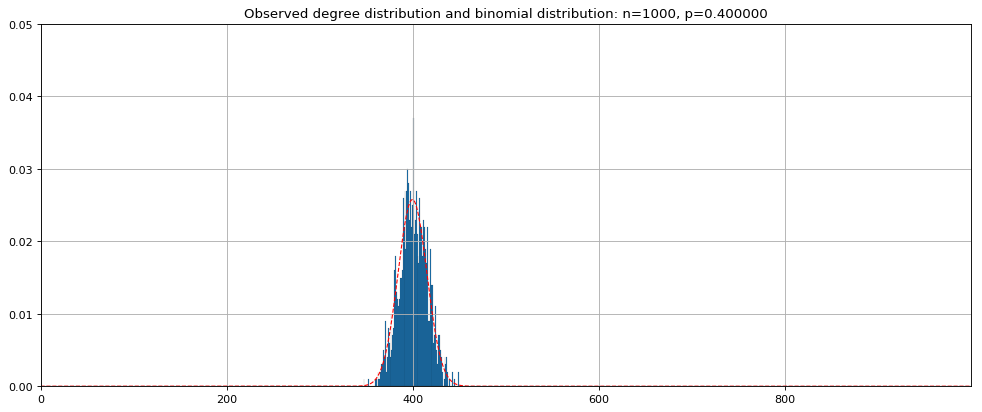

******************Second test*******************


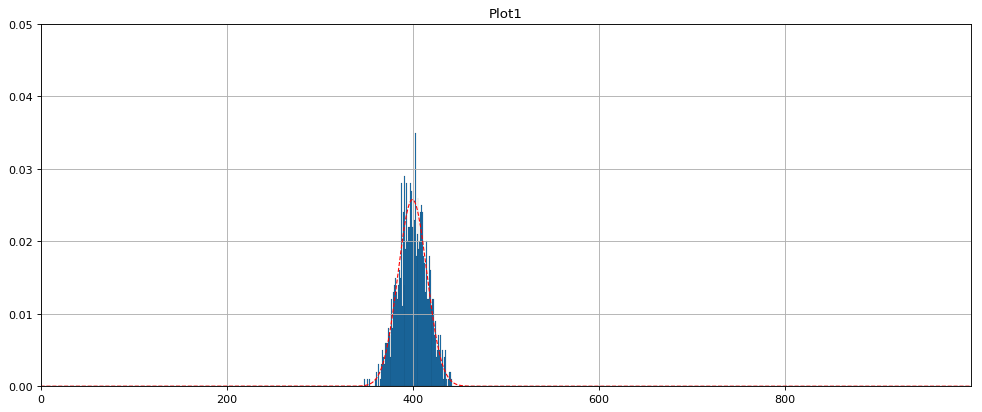

In [4]:
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt

def plot_test(n, p, degree_sequence, counter, title="Plot"):
    # plot setup
    plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='white', edgecolor='green')
    
    # Binomial pmf with parameters n-1, p
    x_axis = np.linspace(0, n-1, n)
    y_axis = np.array([stat.binom.pmf(i, n-1, p) for i in range(n)]) #stat.binom.pmf(x_axis, n-1, p)
    # display degree distribution and binomial pmf
    #print("deg seq")
    #print(degree_sequence)
    my_counter, bins, patches = plt.hist(degree_sequence, x_axis, normed=1.0, edgecolor='k', linewidth=0.1)
    plt.title(title)
    plt.plot(x_axis, y_axis, 'r--', linewidth=1)
    plt.grid(True)
    plt.axis([0, n-1, 0, 0.05])
    plt.show()
    
# G(n, p) model
plot_test(n, p, g_degree_sequence, num_counter, 
          title="Observed degree distribution and binomial distribution: n=%d, p=%f" % (n, p))
print("******************Second test*******************")
num_counterG1[0]=0
plot_test(n, p, g1_degree_sequence, num_counterG1, title="Plot1")

In the above figures, first image represents observed degree distribution of random graph $G(n, p)$ and the binomial pmf with parameters $n$ and $p$. The second image describes observed degree distribution of random graph $G(n, m)$ with $m = \frac{1}{2}pn(n-1)$ and the binomial pmf with parameters $n$ and $p$.

We can see that in both cases, observed degree distribution looks similar to binomial pmf. 

## Exercise 2

In this exercise, we want to demonstrate the following:
- if $np < 1$, a graph in $G_{n,p}$ will almost surely have no connected components of size larger than $O(\log n)$
- if $np = 1$, a graph in $G_{n,p}$ will almost surely have a largest component whose size is $O(n^\frac{2}{3})$,
- if $np \to c > 1$, where c is a constant, then a graph in $G_{n,p}$ will almost surely have a unique giant component containing a positive fraction of the vertices. No other component will contain more than $O(\log n)$ vertices. Furthermore,
- if $np < (1 − \epsilon)\log n$, a graph in $G_{n,p}$ will almost surely contain isolated vertices, and
- if $np > (1 + \epsilon)\log n$, a graph in $G_{n,p}$ will almost surely be connected.

To do so, we will do the following experiments.
- We will generate random graphs $G(n, p)$ with $n \in [100, 200]$ and $p \in [0.003, 0.04]$.
- For each graph we will compute the size of the largest component
- Use color map to visualize the observed sizes

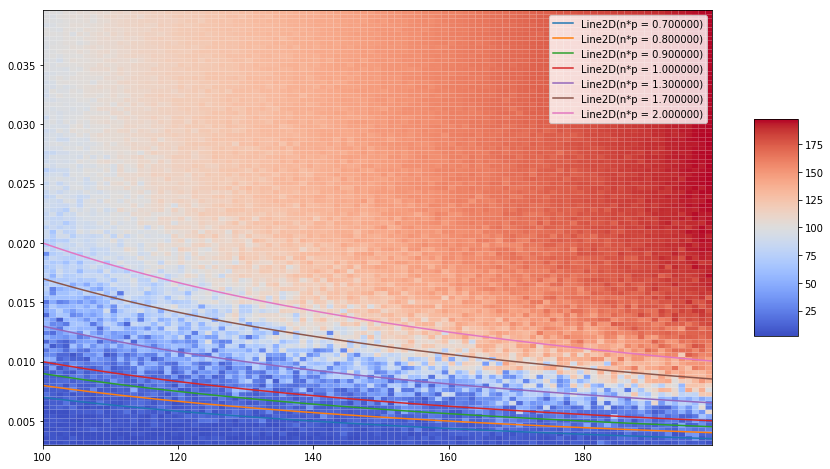

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

def component_experiment((n_l, n_r), (p_l, p_r), seeds = None, offset = 3):
    # n_l, n_r bounds for n
    # p_l, p_r bounds for probability
    # s sample size
    # generate s graphs from G(n,p)
    s = n_r - n_l # sample size
    if seeds is None:
        seeds = np.random.choice(2000000, s*s).reshape((s, s))
    # compute
    
    step_p = float(p_r - p_l) / float(s)
    
    N = np.arange(n_l, n_r, step=1)
    P = np.arange(p_l, p_r, step=step_p)
    
    N, P = np.meshgrid(N, P)
    CC = np.zeros((s, s))
    # r_graphs = []
    for i in range(s):
        # r_graphs.append([])
        for j in range(s):
            G = er.er_np(int(N[i, j]), P[i, j], seed=seeds[i, j])
            # r_graphs[-1].append(G)
            cc_sizes = G.connected_component()[1]
            
            # get the largest
            largest_comp_size = 0 if len(cc_sizes) == 0 else max(cc_sizes)
            # print("Largest comp of graph (%d, %f) is %d" % (int(N[i, j]), P[i, j], largest_comp_size))
            CC[i, j] = largest_comp_size
    
    plot3D(N, P, CC)
        
        

def plot3D(X, Y, Z):
    # plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    fig = plt.figure(figsize=(15, 8))
    mapa = plt.pcolor(X, Y, Z, cmap=cm.coolwarm, antialiased=True)
    fig.colorbar(mapa, shrink=0.5, aspect=5)
    
    # plot a few lines
    tX = X[1]
    n_times_p = [0.7, 0.8, 0.9, 1.0, 1.3, 1.7, 2.0]
    lines = []
    for prod in n_times_p:
        line, = plt.plot(tX, prod / tX, label="n*p = %f"%prod)
        lines.append(line)
    
    plt.legend(lines)
    
    plt.show()
    
component_experiment((100, 200), (0.003, 0.04))

In the above graph, $x$-axis represents number of nodes our graph has, $y$-axis is probability $p$. We plot different lines as a function of $n$ and $p$. More precisely, we plot 7 lines with $n\cdot p \in \{.7, .8, .9, 1.0, 1.3, 1.7, 2.0\}$. We can see that when $n\cdot p < 1$, the size of the largest component is below 20 (with a few exceptions). This confirms that if $np < 1$ then the size of the largest component belongs to $O(\log n)$. 
From the other side, if $np = 1$ (the red line), we see that the size of the largest component is between $20$ and $60$. Again, this is a good evidence that the size of the largest component is of order $O(n^{\frac{2}{3}})$.

One of the things that can be seen in the above plot is that there is a sharp threshold for the size of largest component. Although it is not true that the threshold is $np = 1$, we can see that the threshold line satisfies $np = c$. Thus, increasing $n$ we should observe that $np=1$ is the threshold line. 

Finally, let us try to estimate number of isolated vertices. Similarly as above, we will do:
- generate random graphs $G(n, p)$ for $n \in [1000, 1010]$ and $p \in [0.0001, 0.03]$,
- compute the number of isolated vertices,
- use color map to represent the observed numbers and plot it against $(1+\epsilon)\log(n)$ for $\epsilon \in [-0.2, 0.15]$.

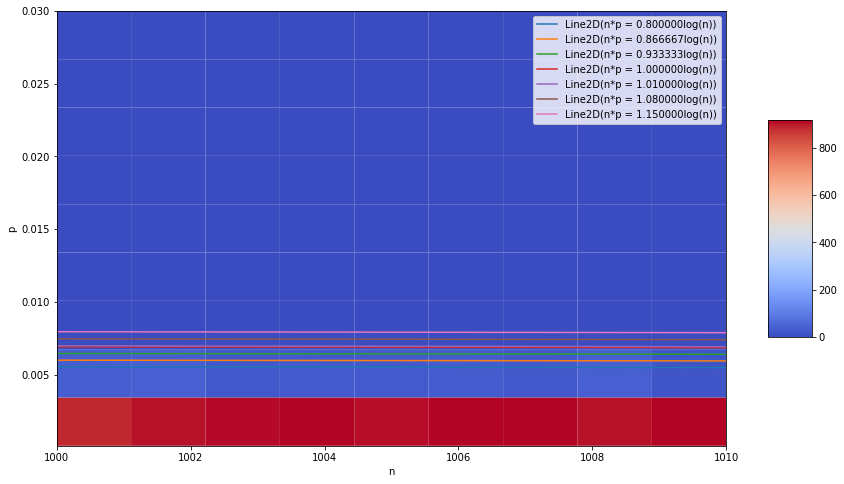

In [16]:
# number of isolated vertices when np in [(1-e)logn, (1+e)logn] for n in [100, 200] and p in [0.02, 0.5]
def isolated_vertices_experiment((n_l, n_r), (p_l, p_r), epsilon):
    p_size = n_size = int(n_r - n_l)
    N, P = np.linspace(n_l, n_r, n_size), np.linspace(p_l, p_r, p_size)

    N, P = np.meshgrid(N, P)
    CC = np.zeros((n_size, p_size))

    for i in range(n_size):
        for j in range(p_size):
            G = er.er_np(int(N[i, j]), P[i, j])
            isolated_vertices = G.find_isolated_vertices()
            CC[i, j] = len(isolated_vertices)

    fig = plt.figure(figsize=(15, 8))
    mapa = plt.pcolor(N, P, CC, cmap=cm.coolwarm, antialiased=True)
    fig.colorbar(mapa, shrink=0.5, aspect=5)

    X = N[0]
    lines = []
    for prod in epsilon:
        line, = plt.plot(X, ((1+prod)*np.log(X))/X, label="n*p = %flog(n)"%(1+prod))
        lines.append(line)

    plt.legend(lines)
    plt.xlabel("n")
    plt.ylabel("p")

    plt.show()
    
n_l, n_r = 1000, 1010
p_l, p_r = 0.0001, 0.03
epsilon = np.concatenate((np.linspace(-0.2, 0.0, 4), np.linspace(0.01, 0.15, 3)))
# run the experiment
isolated_vertices_experiment((n_l, n_r), (p_l, p_r), epsilon)

The above plot represents the number of isolated vertices as a function of $n$ and $p$. We also see 7 lines representing equations $n\cdot p = (1+\epsilon)\log(n)$ for $\epsilon \in [-0.2, 0.15]$.

We can observe the follwoing:
- when $n\cdot p > 1.15\log(n)$ (everything above the pink line), there is no isolated vertices
- when $n\cdot p < 0.8\log(n)$ (everything below the blue line), we see that almost all graphs have at least one isolated vertex

## Exercise 3

In this exercise, we want to ilustrate the relationship between network size $n$, and the fraction of multiple edges and loops resulting from the random attachment of pairs of stubs. To do that we will firstly generate random graphs following configuration model with different values for parameters $n \in [60, 90]$ and $k \in [50, 80]$.
Then, for every $n$ we compute the average ratio obtained from different values of $k$. Then, we plot the observed average ratio as a function of $n$.

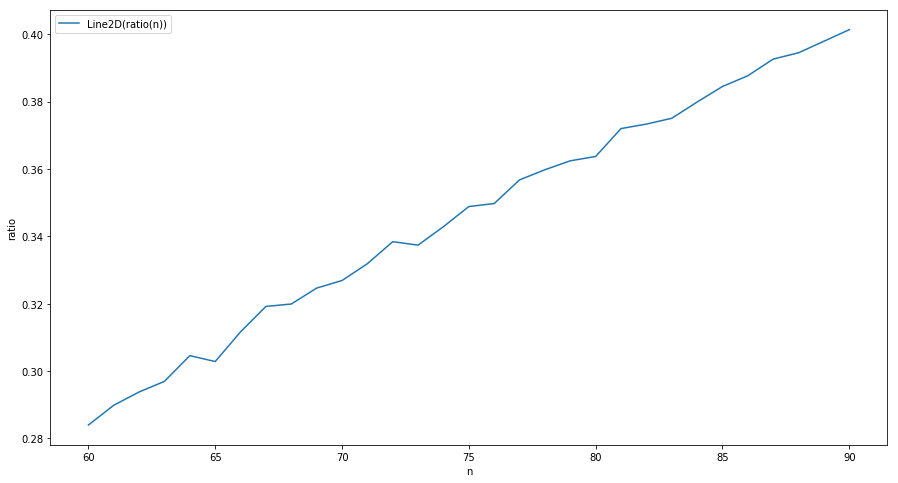

In [19]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import algorithms.newman_model as nm

reload(nm)

def ratio_experiment((n_l, n_r), (k_l, k_r)):
    size = n_r - n_l
    k_size = k_r - k_l
    N = np.linspace(n_l, n_r, size, dtype=int)
    K = np.linspace(k_l, k_r, k_size, dtype=int)
    
    NN, KK = np.meshgrid(N, K)
    ratio = [] #np.zeros((size, k_size))
    for n in range(size):
        current_sum = 0.0
        for k in range(k_size):
            degree_sequence = nm.degree_sequence_regular(int(NN[n, k]), int(KK[n,k]))
            edges = nm.configure_sequence(degree_sequence)
            tmp_ratio = nm.irregular_edge_count(edges)
            current_sum += tmp_ratio
        ratio.append(current_sum / float(k_size))
            
    fig = plt.figure(figsize=(15,8))
    plt.xlabel("n")
    plt.ylabel("ratio")
    line, = plt.plot(N, np.array(ratio), label="ratio(n)")
    
    plt.legend([line])
    #mapa = plt.pcolor(NN, KK, ratio, cmap=cm.coolwarm, antialiased=False)
    #fig.colorbar(mapa, shrink=0.5, aspect=5)
    
    plt.show()
    
ratio_experiment((60, 90), (50, 80))
    

In the above graph, we represent the average value of ratio as a function of $n$. The above graph tells us that the average ratio is linear in terms of n. 